In [1]:
import numpy as np
import pandas as pd
import os
import glob
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# import tensorflow as tf

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
!ls

LICENSE		       centre1.mp4	   corner3_mat.png
adl001.mp4	       centre1_camera.png  corner4.mp4
adl001_mat.mp4	       centre1_mat.mp4	   corner4_camera.png
adl001_mixed.mp4       centre1_mat.png	   corner4_mat.mp4
adl002.mp4	       corner1.mp4	   corner4_mat.png
adl002_mat.mp4	       corner1_camera.png  data
adl002_mixed.mp4       corner1_mat.mp4	   decision-tree-classifer.ipynb
adl003.mp4	       corner1_mat.png	   make_directories.ipynb
adl003_mat.mp4	       corner2.mp4	   mat_camera_align.ipynb
adl003_mixed.mp4       corner2_camera.png  mat_corners.png
adl004.mp4	       corner2_mat.mp4	   read_mat_camera_data.ipynb
adl004_mat.mp4	       corner2_mat.png	   read_timestamps.ipynb
adl004_mixed.mp4       corner3.mp4	   rename_as_timestamp.ipynb
camera_all_points.png  corner3_camera.png  rename_as_timestamp.py
camera_rescaled.png    corner3_mat.mp4	   subject1.7z


# Load the data, find "signatures"

"Signature" is number of "lit" pixels, and sum of all lit pixels.

Discard frames with fewer than 10 lit pixels.

In [3]:
def fall_signature(frame, threshold=10):
    return pd.DataFrame({'s': frame[frame > threshold].sum(axis=1), 'n': frame[frame > threshold].count(axis=1)})

In [9]:
signatures_f = {}
signatures_n = {}
for root, dirs, files in os.walk('data/mat_data/'):
    for file in files:
        if dirs == [] and  file[-3:] == 'csv':
            f = os.path.join(root, file)
            fr = pd.read_csv(f)
            fr.drop(['Frame', 'Timestamp', "Range Min (mmHg)", "Range Max (mmHg)"], axis=1, inplace=True)
            sig = fall_signature(fr)
            if 'Fall' in root:
                signatures_f[f] = sig[sig.n > 10]
            elif 'ADL' in root:
                signatures_n[f] = sig[sig.n > 10]
            else:
                print(f'unknown type {f}')

            # print(root, dirs, files, file)


unknown type data/mat_data/tests/subject1/Corner 1/Corner 1.csv
data/mat_data/tests/subject1/Corner 1 [] ['Corner 1.csv'] Corner 1.csv
unknown type data/mat_data/tests/subject1/adl001/Test1.csv
data/mat_data/tests/subject1/adl001 [] ['Test1.csv'] Test1.csv
unknown type data/mat_data/tests/subject1/Corner 4/Corner 4.csv
data/mat_data/tests/subject1/Corner 4 [] ['Corner 4.csv'] Corner 4.csv
unknown type data/mat_data/tests/subject1/adl002/test2.csv
data/mat_data/tests/subject1/adl002 [] ['test2.csv'] test2.csv
unknown type data/mat_data/tests/subject1/Corner 2/Corner 2.csv
data/mat_data/tests/subject1/Corner 2 [] ['Corner 2.csv'] Corner 2.csv
unknown type data/mat_data/tests/subject1/adl004/test4.csv
data/mat_data/tests/subject1/adl004 [] ['test4.csv'] test4.csv
unknown type data/mat_data/tests/subject1/adl003/test3.csv
data/mat_data/tests/subject1/adl003 [] ['test3.csv'] test3.csv
unknown type data/mat_data/tests/subject1/Corner 3/Corner 3.csv
data/mat_data/tests/subject1/Corner 3 [] ['

In [5]:
# signatures_f = {}

# for f in glob.glob(os.path.join('data', 'mat_data', 'falls/*csv'):
#     fr = pd.read_csv(f)
#     fr.drop(['Frame', 'Timestamp', "Range Min (mmHg)", "Range Max (mmHg)"], axis=1, inplace=True)
#     sig = fall_signature(fr)
#     signatures_f[f] = sig[sig.n > 10]

# signatures_f.keys()

dict_keys(['falls/SFMP0038_Lying_on_right_side_Sisfall_based.csv', 'falls/SFMP0035_Lying_on_right_side_Sisfall_based.csv', 'falls/SFMP0030_Lying_on_left_side_Sisfall_based.csv', 'falls/SFMP0039_Lying_on_right_side_Sisfall_based.csv', 'falls/SFMP0029_Lying_on_left_side_Sisfall_based.csv', 'falls/SFMP0027_Lying_prone_on_back_Sisfall_based.csv', 'falls/SFMP0019_Lying_prone_on_chest_Sisfall_based.csv', 'falls/SFMP0021_Lying_prone_on_chest_Sisfall_based.csv', 'falls/SFMP0020_Lying_prone_on_chest_Sisfall_based.csv', 'falls/SFMP0026_Lying_prone_on_back_Sisfall_based.csv', 'falls/SFMP0017_Lying_prone_on_chest_Sisfall_based.csv', 'falls/SFMP0025_Lying_prone_on_back_Sisfall_based.csv', 'falls/SFMP0016_Lying_prone_on_chest_Sisfall_based.csv', 'falls/SFMP0024_Lying_prone_on_back_Sisfall_based.csv', 'falls/SFMP0034_Lying_on_right_side_Sisfall_based.csv', 'falls/SFMP0022_Lying_prone_on_back_Sisfall_based.csv', 'falls/SFMP0031_Lying_on_left_side_Sisfall_based.csv', 'falls/SFMP0018_Lying_prone_on_ches

In [6]:
# signatures_n = {}

# for f in glob.glob('not-falls/*csv'):
#     fr = pd.read_csv(f)
#     fr.drop(['Frame', 'Timestamp', "Range Min (mmHg)", "Range Max (mmHg)"], axis=1, inplace=True)
#     sig = fall_signature(fr)
#     signatures_n[f] = sig[sig.n > 10]

# signatures_n.keys()

dict_keys(['not-falls/SFMP0089_Prayer_walk_kneel_medium.csv', 'not-falls/SFMP0079_Bump_into_something_sock_small.csv', 'not-falls/SFMP0063_Cain_in_left_hand.csv', 'not-falls/SFMP0087_Back_pack_large_left.csv', 'not-falls/SFMP0070_Walk_drop_recover.csv', 'not-falls/SFMP0041_Fetal_left_side.csv', 'not-falls/SFMP0073_Walking_to_chair_sock_small.csv', 'not-falls/SFMP0074_Walking_to_chair_sock_medium.csv', 'not-falls/SFMP0080_Bump_into_something_sock_medium.csv', 'not-falls/SFMP0053_Medium_step_sock.csv', 'not-falls/SFMP0058_Small_step_slipper.csv', 'not-falls/SFMP0059_Medium_step_slipper.csv', 'not-falls/SFMP0043_Splat_2.csv', 'not-falls/SFMP0085_Back_pack_small_left.csv', 'not-falls/SFMP0064_Cain_in_right_hand.csv', 'not-falls/SFMP0084_Large_steps_right_hand_bag_down.csv', 'not-falls/SFMP0071_Walk_drop_knee_recover.csv', 'not-falls/SFMP0049_Feet_up.csv', 'not-falls/SFMP0044_Yoga_position.csv', 'not-falls/SFMP0076_Walking_from_chair_small_sock.csv', 'not-falls/SFMP0077_Walking_from_chair_m

In [10]:
len(signatures_f) + len(signatures_n)

114

In [7]:
# signatures_f['falls/SFMP0022_Lying_prone_on_back_Sisfall_based.csv']

,s,n
0,5541.0,172
1,5524.0,171
2,5568.0,173
3,5536.0,172
4,5542.0,172
...,...,...
203,5896.0,171
204,5887.0,171
205,5839.0,171
206,5819.0,171


## Combine the data

In [11]:
sfs = pd.concat(signatures_f.values(), ignore_index=True)
sns = pd.concat(signatures_n.values(), ignore_index=True)

In [12]:
sfs['a'] = sfs.s / sfs.n
sns['a'] = sns.s / sns.n

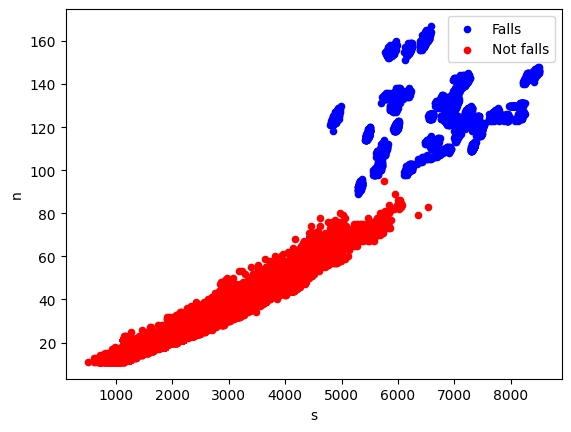

In [13]:
ax = sfs.plot.scatter(x="s", y="n", color="Blue", label="Falls")
sns.plot.scatter(x="s", y="n", color="red", label="Not falls", ax=ax);

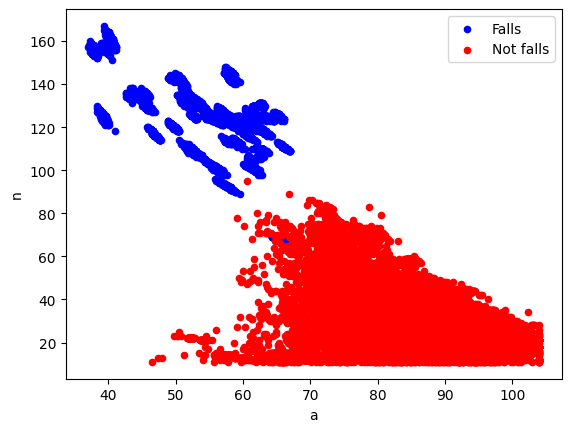

In [14]:
ax = sfs.plot.scatter(x="a", y="n", color="Blue", label="Falls")
sns.plot.scatter(x="a", y="n", color="red", label="Not falls", ax=ax);

In [15]:
sns[sns.n < 150].shape

(18964, 3)

In [16]:
sns.shape

(18964, 3)

# Package data into X and y numpy arrays

In [17]:
sfs['y'] = 1
sns['y'] = 0

In [18]:
all_xy = pd.concat([sfs, sns])
all_xy.shape

(26837, 4)

In [19]:
all_xy

,s,n,a,y
0,6243.0,101,61.811881,1
1,6252.0,101,61.900990,1
2,6255.0,103,60.728155,1
3,6242.0,100,62.420000,1
4,6243.0,100,62.430000,1
...,...,...,...,...
18959,1563.0,17,91.941176,0
18960,1581.0,17,93.000000,0
18961,1602.0,17,94.235294,0
18962,1604.0,17,94.352941,0


In [20]:
all_x = all_xy[['n', 'a']].to_numpy()
all_y = all_xy[['y']].to_numpy().reshape(-1)
column_names = ["n", "a"]
all_x.shape, all_y.shape

((26837, 2), (26837,))

# Train a decision tree

In [21]:
X_train, X_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.25)
X_train.shape, y_train.shape

((20127, 2), (20127,))

In [22]:
y_train

array([0, 0, 1, ..., 1, 0, 1])

In [23]:
np.bincount(y_train), np.bincount(y_test), 

(array([14240,  5887]), array([4724, 1986]))

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
clf.score(X_train, y_train)

0.9987082029115119

In [26]:
clf.score(X_test, y_test)

0.9949329359165425

In [27]:
clf.get_depth()

24

In [28]:
clf.get_n_leaves()

113

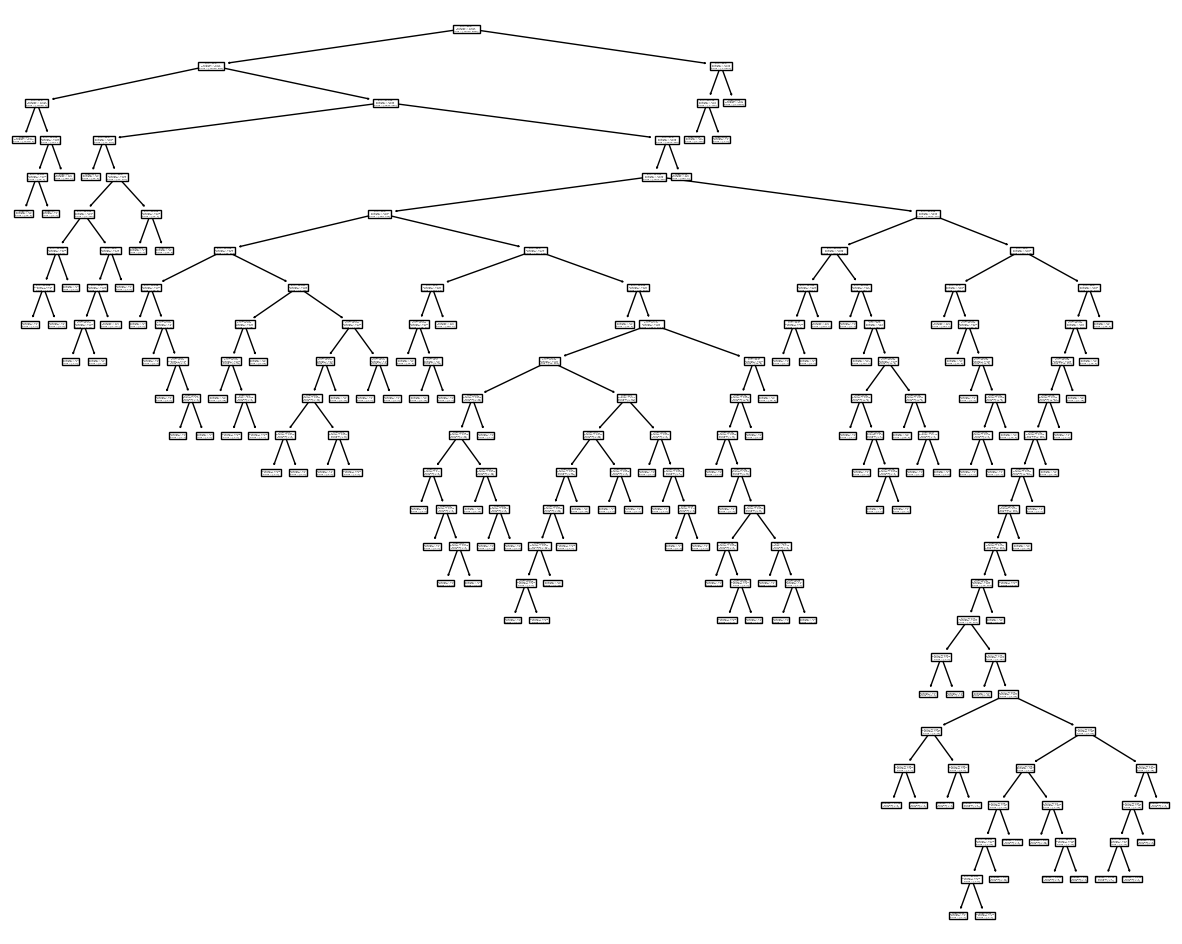

In [29]:
plt.figure(figsize=(15, 12))
tree.plot_tree(clf,
              feature_names=column_names,
              node_ids=True,
              );

## Train a smaller decision tree

The one above probably overfits the data. How well does a smaller one do?

In [30]:
clf_depth_2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [31]:
clf_depth_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
clf_depth_2.score(X_train, y_train)

0.974164058230238

In [33]:
clf_depth_2.score(X_test, y_test)

0.9737704918032787

In [34]:
clf_depth_2.get_depth()

3

In [35]:
clf_depth_2.get_n_leaves()

7

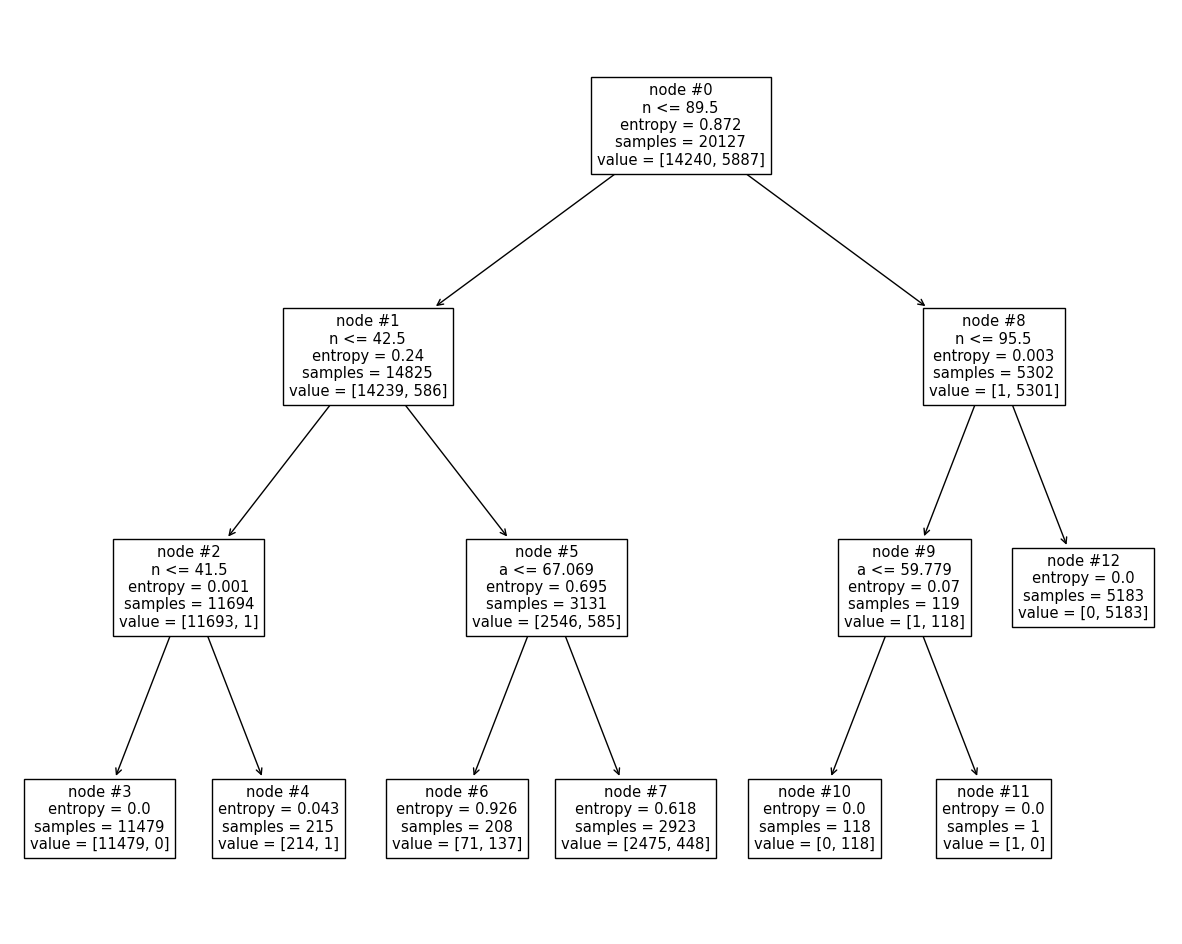

In [36]:
plt.figure(figsize=(15, 12))
tree.plot_tree(clf_depth_2,
              feature_names=column_names,
              node_ids=True,
              );

In [37]:
y_pred = clf.predict(X_test)

In [38]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4718
           1       0.99      0.99      0.99      1992

    accuracy                           0.99      6710
   macro avg       0.99      0.99      0.99      6710
weighted avg       0.99      0.99      0.99      6710

